# **I. Kiến trúc CNNs**

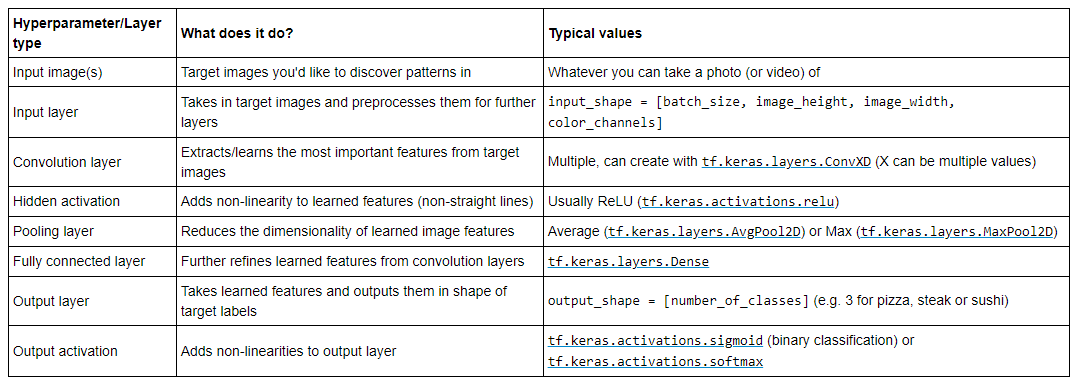

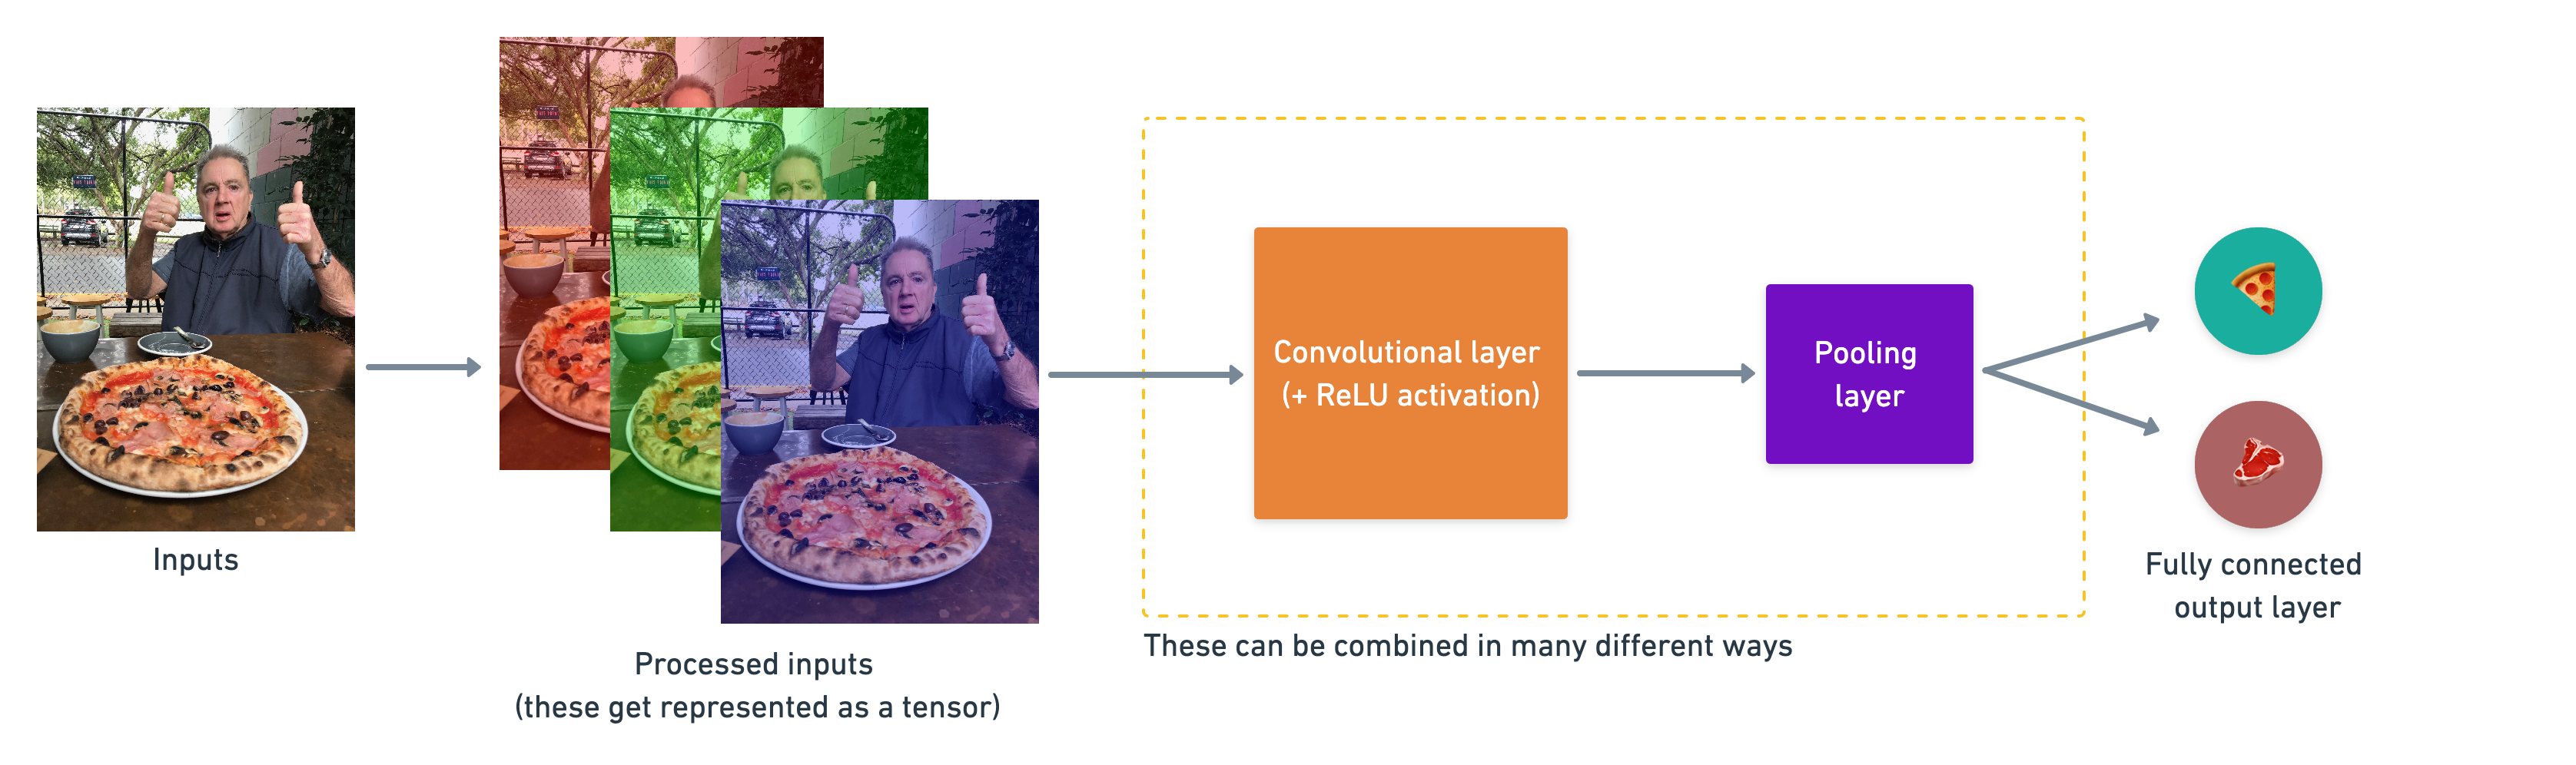

# **Lấy Dữ liệu**

In [ ]:
import zipfile

# download zip file of pizza_steak img
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip",'r')
zip_ref.extractall()
zip_ref.close()

--2021-06-09 02:37:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.253.119.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  81.5MB/s    in 1.3s    

2021-06-09 02:37:48 (81.5 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



# **Kiểm tra dữ liệu**

Chúng ta tiến hành kiểm tra xem tệp dữ liệu đã được định dạng theo đúng định dạng điển hình có thể sử dụng để làm việc với hình ảnh hay chưa.

Cụ thể:
- Thư mục `train` chứa tất cả các hình ảnh trong tập huấn luyện với các thư mục con, mỗi thư mục con đặt tên theo một lớp nhất định chứa các hình ảnh của lớp đó.
- Thư mục `test` cũng có cấu trúc giống với thư mục `train`.

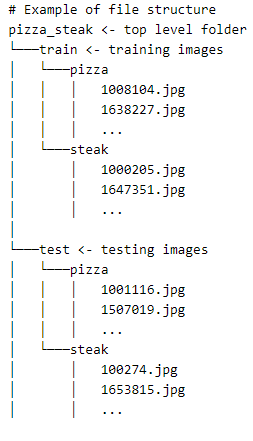

Để kiểm tra, chúng ta sẽ sử dụng câu lênh `ls` viết tắt của list

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
class_names = class_names[1:]
print(class_names)


['pizza' 'steak']


Liệt kê thông tin các thư mục

In [ ]:
import os


for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


Xem ảnh

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Set up target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample( os.listdir(target_folder), 1)

  # Read in image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  # Show the shape of the image
  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


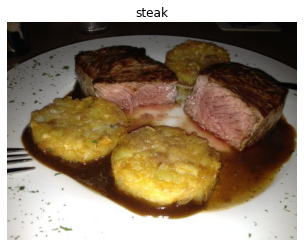

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",target_class="steak")

Image shape: (512, 384, 3)


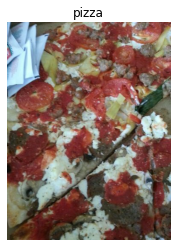

In [ ]:

# View a random image from the training dataset
img2 = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

Xem ảnh dưới dạng tensor

In [ ]:
# View the img (actually just a big array/tensor)
img

array([[[ 49,  42,  24],
        [ 50,  41,  24],
        [ 50,  41,  24],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 51,  44,  26],
        [ 52,  43,  26],
        [ 52,  43,  26],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 54,  46,  27],
        [ 54,  46,  27],
        [ 54,  46,  27],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       ...,

       [[210, 207, 202],
        [210, 207, 202],
        [210, 207, 202],
        ...,
        [198, 197, 193],
        [191, 190, 188],
        [192, 191, 189]],

       [[209, 206, 201],
        [208, 205, 200],
        [209, 206, 201],
        ...,
        [198, 197, 193],
        [194, 193, 191],
        [191, 190, 188]],

       [[211, 208, 203],
        [208, 205, 200],
        [207, 204, 199],
        ...,
        [194, 193, 189],
        [196, 195, 193],
        [195, 194, 192]]

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(384, 512, 3)

In [ ]:
img2.shape

(512, 384, 3)

Ta thấy cấu trúc Shape của ảnh ở dạng (`Width, Height, Color`)

`Width` và `Height` có thể khác nhau, nhưng kên `Color` luôn là 3 vì chúng ta đang xử lí trên ảnh màu với kênh màu sử dụng là RGB

Có thể nhận thấy tất cả các giá trị trong mảng img nằm trong khoảng từ 0 đến 255. Điều này là do đó là phạm vi có thể có cho các giá trị màu đỏ(R), xanh lục(G) và xanh lam(B).

Vì vậy, khi chúng ta xây dựng một mô hình để phân biệt giữa hình ảnh bánh `pizza` và `steak`, nó sẽ tìm ra các mẫu trong các giá trị pixel khác nhau này để xác định mỗi lớp trông như thế nào

# **Thực hiện mô hình**

Như đã biết, nhiều mô hình học máy, bao gồm cả mạng nơron thích các giá trị mà chúng hoạt động nằm trong khoảng từ 0 đến 1. Biết được điều này, một trong những bước tiền xử lý phổ biến nhất để làm việc với hình ảnh là chia tỷ lệ (còn được gọi là chuẩn hóa) các giá trị pixel của chúng bằng cách chia các mảng hình ảnh cho 255.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set  the seed
tf.random.set_seed(42)

# Preprocess data ( get all of the pixel values between 0 and 1, also called  scalling/normalization )
train_datagen = ImageDataGenerator( rescale = 1. / 255 )
valid_datagen = ImageDataGenerator( rescale = 1. / 255 )

# Setup the train and test directories

train_dir =   "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32, # numbers of images to process at the time
                                               target_size = (224,224), # convert all images to  be 224x224
                                               class_mode = "binary", # type of problem we're working on
                                               seed = 42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              seed = 42)

# Create a CNN model 
CNN_model_1 = tf.keras.models.Sequential(
    [
     # first layer specifies input shape (height, width, colour channels)
     tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
     tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
     tf.keras.layers.MaxPool2D(pool_size = 2, # 
                            padding = 'valid'),
     tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
     tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation = 'sigmoid' ) # binary activation output
     ]
)

# Compile the model 
CNN_model_1.compile(loss = 'binary_crossentropy',
                    optimizer = 'Adam',
                    metrics = ['accuracy'])

# Fit the model
history_1 = CNN_model_1.fit(train_data, epochs = 5,
                            steps_per_epoch = len(train_data),
                            validation_data = test_data,
                            validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 99s 2s/step - loss: 0.5558 - accuracy: 0.7300 - val_loss: 0.4169 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 98s 2s/step - loss: 0.4214 - accuracy: 0.8073 - val_loss: 0.3300 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 98s 2s/step - loss: 0.4085 - accuracy: 0.8180 - val_loss: 0.3235 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 97s 2s/step - loss: 0.3617 - accuracy: 0.8527 - val_loss: 0.3355 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 97s 2s/step - loss: 0.3274 - accuracy: 0.8627 - val_loss: 0.3649 - val_accuracy: 0.8320


Sau 5 epoch, mô hình của ta đã đạt được độ chính xác 86.33% trên bộ huấn luyện và 86% trên bộ thử nghiệm

In [ ]:
# Check out the layers in our model
CNN_model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
x = tf.constant([[1., 2., 3., 4.],
                 [5., 6., 7., 8.],
                 [9., 10., 11., 12.]])
x = tf.reshape(x, [1, 3, 4, 1])
x

<tf.Tensor: shape=(1, 3, 4, 1), dtype=float32, numpy=
array([[[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.]],

        [[ 5.],
         [ 6.],
         [ 7.],
         [ 8.]],

        [[ 9.],
         [10.],
         [11.],
         [12.]]]], dtype=float32)>

# **Sử dụng mô hình phân loại (Classication)**

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
     tf.keras.layers.Dense(4, activation = 'relu'),
     tf.keras.layers.Dense(4, activation = 'relu'),
     tf.keras.layers.Dense(1, activation = 'sigmoid')
    ]
)

# Compile the model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit( train_data, epochs = 5,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 249ms/step - loss: 1.6991 - accuracy: 0.4927 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 260ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 227ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


Có vẻ như mô hình đã chạy nhưng nó chưa học được gì. Nó chỉ đạt độ  chính xác khoảng 50% cho cả tập huấn luyện và tập kiểm tra

In [ ]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Ta thấy số lượng tham số trong mô hình 2 lớn hơn rất nhiều so với mô hình 1

mô hình 2 có 602,141 tham số có thể tham gia huấn luyện trong khi mô hình 1 chỉ có 31,101. Nhưng dù có sự khác biệt đáng kể này thì mô hình 1 vẫn hoạt động tốt hơn so với mô hình 2

> => Một **convolutional neural network** tìm kiếm cách sắp xếp và tìm hiểu các mẫu quan trọng nhất trong một hình ảnh. Vì vậy, mặc dù có ít tham số tham gia vào CNNs nhưng những tham số này thường hữu ích hơn trong việc phân tách các đặc trưng của đối tượng trong ảnh.





Thử cải tiến mô hình 2 bằng cách tăng số lượng noron trong mỗi lớp từ 4 lên 100 và thêm vào 1 lớp bổ sung.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model 
model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
     tf.keras.layers.Dense(100, activation = 'relu'), # increase numbers of neurons from 4 to 100
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1, activation = 'sigmoid')
    ]
)

# Compile the model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

# Fit the model 
history_3  = model_3.fit(train_data, epochs = 5,
                         validation_data = test_data,
                         validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 295ms/step - loss: 3.1578 - accuracy: 0.6153 - val_loss: 0.6852 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 14s 288ms/step - loss: 0.7619 - accuracy: 0.6987 - val_loss: 0.6678 - val_accuracy: 0.6920
Epoch 3/5
47/47 [==============================] - 14s 290ms/step - loss: 0.7909 - accuracy: 0.7093 - val_loss: 0.4401 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 14s 288ms/step - loss: 0.6419 - accuracy: 0.7213 - val_loss: 0.4511 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 14s 290ms/step - loss: 0.5093 - accuracy: 0.7673 - val_loss: 0.4616 - val_accuracy: 0.7820


Có vẻ như mô hình đã hoạt động tốt hơn khi có độ chính xác trên 70% cho cả tập huấn luyện và tập kiểm tra

In [ ]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Số lượng tham số tham gia vào huấn luyện tăng nhiều so với mô hình 2 và gấp gần 500 lần so với mô hình 1, nhưng nó vẫn chưa hoạt động tốt bằng mô hình 1

# **Binary classification**'



**1. Import and become one with the data**



In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-06-09 02:50:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   127MB/s    in 0.8s    

2021-06-09 02:50:46 (127 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



Image shape: (382, 512, 3)
Image shape: (512, 307, 3)


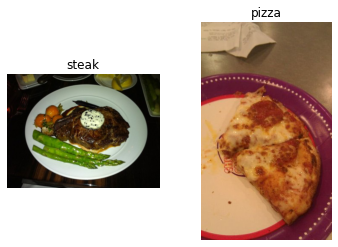

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

**2. Preprocess the data (prepare it for a model)**


In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Tiếp theo chia dữ liệu thành các batch

1 batch là một tập con nhỏ của tập dữ liệu mà một mô hình xem xét trong quá trình đào tạo. Ví dụ: thay vì xem 10.000 hình ảnh cùng một lúc và cố gắng tìm ra các mẫu, một người mẫu có thể chỉ xem 32 hình ảnh cùng một lúc.



In [ ]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

0 : pizza

1 : steak

**3. Create a model (start with a baseline)**

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Chúng ta đã có một kiến trúc CNNs đơn giản sẵn sàng hoạt động.

Và nó tuân theo cấu trúc

> `# Basic structe of CNN:`

> `Input -> Conv + ReLu layers (non-linearities) -> Pooling layer -> Fully connected (Dense layer) as Output`

Một số thành phần của Conv2D layer:
- "2D" có nghĩa là đầu vào của chúng ta là 2 chiều(`Height` và `Width`), ngay cả khi có 3 kênh màu, các tập hợp được chạy trên từng kênh riêng lẻ.
- `filters` : Số lượng 'feature extractors'(Đặc tính trích xuất) sẽ di chuyển trên hình ảnh của chúng ta
- `kernel_size`: kích thước của `filter`, ví dụ một `kernel_size` (3, 3) (hoặc chỉ 3 ) có nghĩa là mỗi `filter` sẽ có kích thước 3x3, nghĩa là nó sẽ nhìn vào khoảng không gian 3x3 pixels mỗi lần. Kernel càng nhỏ thì càng có nhiều đặc trưng chi tiết hơn.
- `stride` : số pixel mà `filter` sẽ di chuyển khi nó bao phủ qua ảnh. `stride` = 1 có nghĩa là `filter` sex di chuyển qua 1 pixel.
- `padding` : có thể nhận giá trị `same` hoặc `valid`. `same` thêm các số 0 vào bên ngoài hình ảnh để kết quả đầu ra của lớp tích chập giống với đầu vào, trong khi `valid`(được mặc định) cắt bỏ các pixel thừa mà bộ lọc `filter` không vừa ( ví dụ độ rộng 224 pixel chia cho  kích thước nhân là 3 (224/3 = 74,6) có nghĩa là một pixel duy nhất sẽ bị cắt bỏ ở phần cuối)



In [ ]:
  # Compile the model
  model_4.compile(loss='binary_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

**4. Fit a model**


In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 114s 2s/step - loss: 1.0757 - accuracy: 0.6733 - val_loss: 0.4434 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 112s 2s/step - loss: 0.4463 - accuracy: 0.8013 - val_loss: 0.4090 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 112s 2s/step - loss: 0.3552 - accuracy: 0.8467 - val_loss: 0.3793 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 113s 2s/step - loss: 0.2116 - accuracy: 0.9267 - val_loss: 0.4095 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 122s 3s/step - loss: 0.0865 - accuracy: 0.9720 - val_loss: 0.7555 - val_accuracy: 0.7420


- `steps_per_epochs` : Số lượng batch mà mô hình sẽ trải qua trong mỗi epoch, chúng ta muốn mô hình của mình đi qua tất cả các batch để nó bằng độ dài của train_data (1500 img trong 32 batch: 1500/32 = 47 step)
- `validation_steps` : tương tự như trên(500 img trong 32 batch: 500/32 = 16 step) 

**5. Evaluate the model**



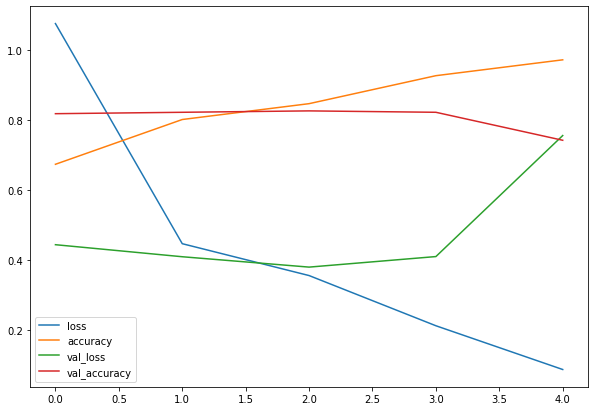

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Có vẻ nhu mô hình đang bị **overfitting**

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

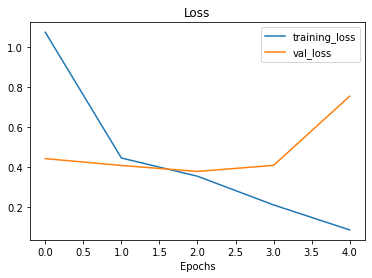

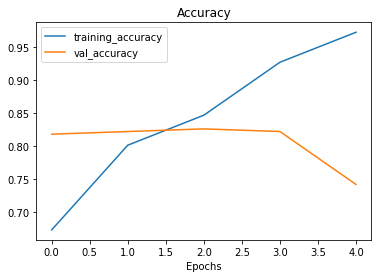

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


**6. Adjust the model parameters**

Hợp mô hình học máy gồm 3 bước:
1. Tạo đường cơ sỏ
2. Vượt qua giới hạn cơ sở bằng cách overfitting một mô hình lớn hơn
3. Giảm overfitting

Chúng ta đã thực hiện 1 và 2. Bây giờ ta sẽ tập trung vào việc làm cho các đường cong đào tạo của mô hình hợp với nhau hơn, nói cách khác là đi giảm overfitting.

Tại sao cần giảm overfitting?

Khi một mô hình hoạt động quá tốt trên dữ liệu đào tạo và kém trên dữ liệu không nhìn thấy, nó không có ích gì nếu chúng ta muốn sử dụng nó trong thế giới thực.

Vì vậy, đối với một số mô hình tiếp theo mà chúng ta xây dựng, chúng ta sẽ điều chỉnh một số thông số và kiểm tra các đường đào tạo trong quá trình

Cụ thể, chúng ta sẽ xây dựng thêm 2 mô hình:
- A ConvNet with `max pooling`
- A ConvNet with `max pooling` and `data augmentation `

Đối với mô hình đầu tiên, chúng ta sẽ đi theo cấu truc:

> `# Basic structure of CNN with max pooling`
> 
> `Input -> Conv layers + ReLu layers (non-linearities) + Max Pooling layers -> Fully connected (Dense layer) as Output`

In [ ]:
# Create the model 
model_5 =  Sequential(
    [
     Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
     MaxPool2D( pool_size = 2),  # reduce number of features by half
     Conv2D(10, 3, activation = 'relu'),
     MaxPool2D(),
     Conv2D(10, 3, activation = 'relu'),
     MaxPool2D(),
     Flatten(),
     Dense(1, activation = 'sigmoid')
    ]
)

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 51s 1s/step - loss: 0.6115 - accuracy: 0.6507 - val_loss: 0.4743 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 50s 1s/step - loss: 0.4737 - accuracy: 0.7887 - val_loss: 0.4377 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 50s 1s/step - loss: 0.4394 - accuracy: 0.8093 - val_loss: 0.3827 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 50s 1s/step - loss: 0.4202 - accuracy: 0.8147 - val_loss: 0.4117 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 50s 1s/step - loss: 0.3919 - accuracy: 0.8287 - val_loss: 0.3766 - val_accuracy: 0.8300


Có vẻ như mô hình của chúng ta với `max pooling` (model_5) đang hoạt động kém hơn trên tập huấn luyện nhưng tốt hơn trên tập xác thực.

In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

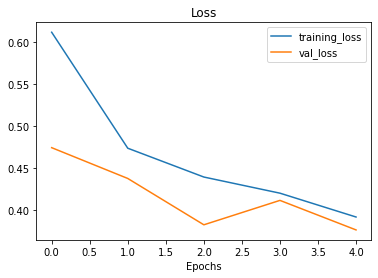

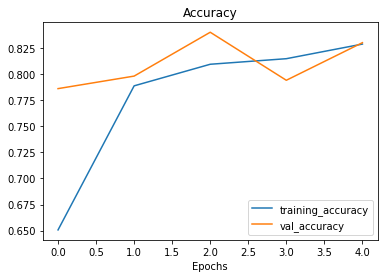

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

Chúng ta có thể thấy các đường cong đào tạo tiến gần đến nhau hơn rất nhiều. Tuy nhiên, val_loss có vẻ sẽ bắt đầu tăng dần về cuối và do đó có khả năng dẫn đến overfitting.

Để triển khai tăng cường dữ liệu, chúng ta sẽ phải khôi phục các phiên bản `ImageDataGenerator` của mình.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data augmentation**(Tăng cường dữ liệu) là quá trình thay đổi dữ liệu đào tạo , dẫn đến việc dữ liệu này có tính đa dạng hơn và do đó cho phép các mô hình của chúng ta học được nhiều mẫu có thể khái quát hơn. Thay đổi có thể có nghĩa là điều chỉnh xoay hình ảnh, lật hình ảnh, cắt hình ảnh hoặc điều gì đó tương tự.

Việc làm này mô phỏng loại dữ liệu mà một mô hình có thể được sử dụng trong thế giới thực.

Nếu chúng ta đang xây dựng ứng dụng nhận biết pizza với steak, thì không phải tất cả hình ảnh mà người dùng của chúng ta chụp đều có thể có thiết lập tương tự với dữ liệu đào tạo của chúng ta. Việc sử dụng tăng cường dữ liệu mang lại cho chúng ta một cách khác để ngăn chặn việc trang bị quá mức và từ đó làm cho mô hình của chúng ta dễ tổng quát hơn.

> **Chú ý**: Việc tăng dữ liệu thường chỉ được thực hiện trên dữ liệu đào tạo. Sử dụng các tham số tăng dữ liệu tích hợp của `ImageDataGenerator`, hình ảnh của chúng ta được giữ nguyên như chúng nằm trong thư mục nhưng được thao tác ngẫu nhiên khi tải vào mô hình

In [ ]:
# import data and augment it from training directory
print('Augment training images:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size = (224, 224),
                                                         batch_size = 32,
                                                         class_mode = 'binary',
                                                         shuffle = False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle
                                                      
# Create non-augmented data batches 
print('Non-augmented training images:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False) # Don't shuffle for demonstration purposes

print('Unchanged test images:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'binary')

Augment training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

(-0.5, 223.5, 223.5, -0.5)

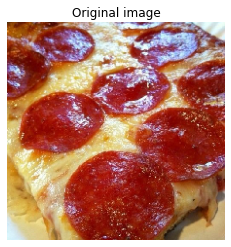

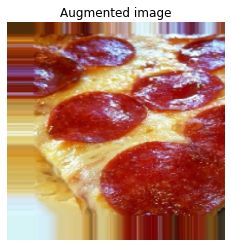

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # making batches of size 32, we will get a random instance
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False)

Sau khi xem qua một mẫu hình ảnh gốc và hình ảnh tăng cường, ta có thể bắt đầu thấy một số biến đổi ví dụ trên hình ảnh đào tạo.

Lưu ý một số hình ảnh tăng cường trông giống như các phiên bản hơi bị cong vênh của hình ảnh gốc. Điều này có nghĩa là mẫu của chúng ta sẽ buộc phải thử và học các mẫu trong những hình ảnh kém hoàn hảo, điều này thường xảy ra khi sử dụng hình ảnh trong thế giới thực

**🤔** Vậy có nên sử dụng dữ liệu tăng cường không? Và nên tăng thêm bao nhiêu?

> Tăng dữ liệu là một cách để thử và ngăn mô hình bị overfitting. Nếu mô hình của  bị overfitting (ví dụ: validation_loss tiếp tục tăng), ta có thể thử sử dụng tăng cường dữ liệu.

Mức tăng cường dữ liệu bao nhiêu là hợp lí. -> Không có thông lệ nào cho việc này. Tốt nhất hãy kiểm tra các tùy chọn trong lớp `ImageDataGenerator` và suy nghĩ về cách một mô hình trong trường hợp sử dụng có thể hưởng lợi từ một số tăng cường dữ liệu

Bây giờ chúng ta đã có dữ liệu tăng cường, hãy thử và trang bị lại một mô hình trên đó và xem nó ảnh hưởng như thế nào đến việc đào tạo.

In [ ]:
# Create the model
model_6 = Sequential(
    [
     Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
     MaxPool2D(pool_size = 2), # reduce number of features be half
     Conv2D(10, 3, activation = 'relu'),
     MaxPool2D(),
     Conv2D(10, 3, activation = 'relu'),
     MaxPool2D(),
     Flatten(),
     Dense(1, activation = 'sigmoid')
    ]
)

# Compile the model
model_6.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

# Fit the model 
history_6  = model_6.fit(train_data_augmented, epochs = 5,  # change to augmented training data
                         steps_per_epoch = len(train_data_augmented),
                         validation_data = test_data,
                         validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 63s 1s/step - loss: 0.7159 - accuracy: 0.5547 - val_loss: 0.6881 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 62s 1s/step - loss: 0.6954 - accuracy: 0.5187 - val_loss: 0.6733 - val_accuracy: 0.7140
Epoch 3/5
47/47 [==============================] - 62s 1s/step - loss: 0.6742 - accuracy: 0.6220 - val_loss: 0.6244 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 62s 1s/step - loss: 0.6746 - accuracy: 0.5773 - val_loss: 0.5506 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 62s 1s/step - loss: 0.5963 - accuracy: 0.7040 - val_loss: 0.5347 - val_accuracy: 0.7460


Có vẻ như mô hình của chúng ta ban đầu hoạt động không được hiệu quả

Đó là do khi chúng ta tạo tập `train_data_augmented` đã tắt tính năng xáo trộn `(Shuffle = False)`, có nghĩa là mô hình chỉ nhận được một loạt các hình ảnh duy nhất tại một thời điểm.

Ta cũng có thể nhận thấy mỗi epoch mất nhiều thời gian hơn khi đào tạo với dữ liệu tăng cường so với khi đào tạo với dữ liệu không tăng cường (~ 25 giây epoch so với ~ 10 giây mỗi epoch).

Điều này là do cá thể `ImageDataGenerator` tăng cường dữ liệu khi nó được tải vào mô hình. Lợi ích của việc này là nó không thay đổi hình ảnh ban đầu. Nhược điểm là mất nhiều thời gian hơn để tải chúng vào.

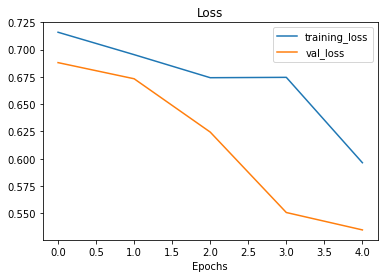

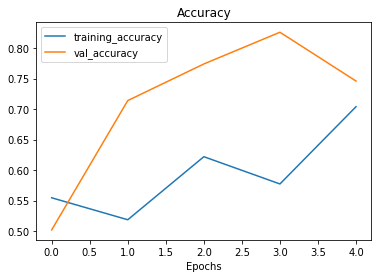

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

Có vẻ như đường cong validation_loss của chúng ta đang đi đúng hướng nhưng nó hơi nhảy (đường cong mất mát lý tưởng nhất không quá nhọn mà là một đường dốc trơn, tuy nhiên, một đường cong mất mát hoàn toàn trơn tru tương đương với một câu chuyện cổ tích).

Hãy xem điều gì sẽ xảy ra khi chúng ta xáo trộn dữ liệu đào tạo tăng cường.

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
  
# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 62s 1s/step - loss: 0.6087 - accuracy: 0.6633 - val_loss: 0.4289 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 61s 1s/step - loss: 0.5609 - accuracy: 0.7093 - val_loss: 0.4328 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 61s 1s/step - loss: 0.4818 - accuracy: 0.7807 - val_loss: 0.3909 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 61s 1s/step - loss: 0.4729 - accuracy: 0.7753 - val_loss: 0.3973 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 61s 1s/step - loss: 0.4687 - accuracy: 0.7820 - val_loss: 0.3263 - val_accuracy: 0.8620


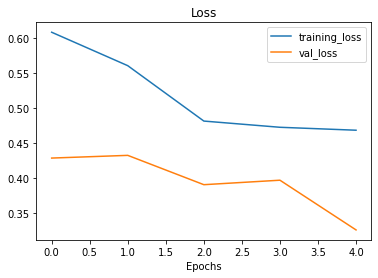

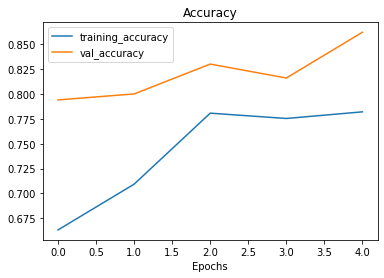

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

Với model_7 hiệu suất trên tập dữ liệu đào tạo đã cải thiện gần như ngay lập tức so với model_6. Điều này là do chúng ta xáo trộn dữ liệu đào tạo khi chúng ta chuyển nó vào mô hình bằng cách sử dụng tham số `shuffle = True` trong phương thức `flow_from_directory`.

Điều này có nghĩa là mô hình có thể xem các ví dụ về cả hình ảnh `pizza` và `steak` trong mỗi `batch` và lần lượt được đánh giá dựa trên những gì nó học được từ cả hai hình ảnh thay vì chỉ một loại.

Các đường cong mất mát đã mượt hơn so với mô hình 

**7. Repeat until satisified**

Mô hình đào tạo hiện tại hoạt động khá tốt.

Vì chúng ta đã vượt qua giới hạn đường cơ bản, nên có một số điều chúng ta có thể cố gắng tiếp tục cải thiện mô hình của mình:

- Tăng số lượng lớp mô hình 
- Tăng số lượng `filter` trong mỗi lớp phức hợp (10, 32, 64, hay 128)
- Tăng thời gian huấn luyện (thêm epoch)
- Tìm `learning rate` lý tưởng
- Cung cấp thêm dữ liệu cho mô hình
- Sử dụng **transfer learning** để tận dụng những gì một mô hình hình ảnh khác đã học được và điều chỉnh nó cho trường hợp sử dụng của riêng chúng ta.

Điều chỉnh từng cài đặt này (ngoại trừ hai cài đặt cuối cùng) trong quá trình phát triển mô hình thường được gọi là điều chỉnh siêu thông số.



In [ ]:
# Create a CNN model 
model_8 = Sequential(
    [
     Conv2D(10, 3, activation = 'relu', input_shape = (224, 224,3)),
     Conv2D(10, 3, activation = 'relu'),
     MaxPool2D(),
     Conv2D(10, 3, activation = 'relu'),
     Conv2D(10, 3, activation = 'relu'),     
     MaxPool2D(),
     Flatten(),
     Dense(1, activation = 'sigmoid')
    ]
)

# Compile the model
model_8.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled, epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 112s 2s/step - loss: 0.5978 - accuracy: 0.6727 - val_loss: 0.4866 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 111s 2s/step - loss: 0.5149 - accuracy: 0.7500 - val_loss: 0.4262 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 111s 2s/step - loss: 0.5045 - accuracy: 0.7580 - val_loss: 0.3930 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 111s 2s/step - loss: 0.4754 - accuracy: 0.7927 - val_loss: 0.3496 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 111s 2s/step - loss: 0.4941 - accuracy: 0.7840 - val_loss: 0.3872 - val_accuracy: 0.8480


In [ ]:
# Check model_1 architecture (same as model_8)
CNN_model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# Check model_1 architecture (same as model_8)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

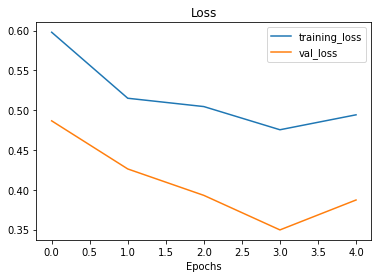

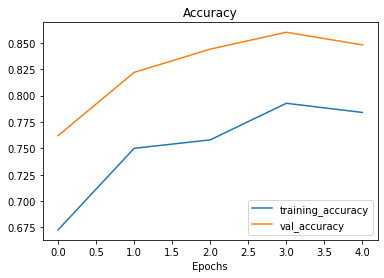

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

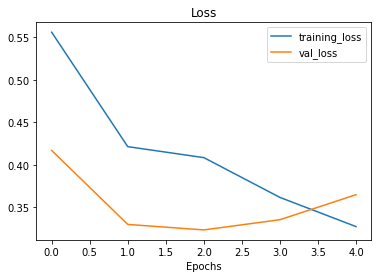

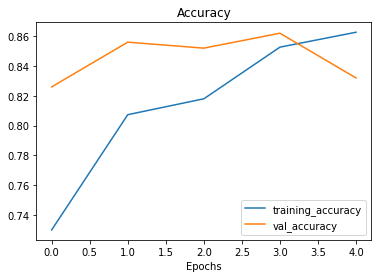

In [ ]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

**Making a prediction with our trained model**

In [ ]:
# Classes we'll working with
print(class_names)

['pizza' 'steak']


Hình ảnh sử dụng để dự báo

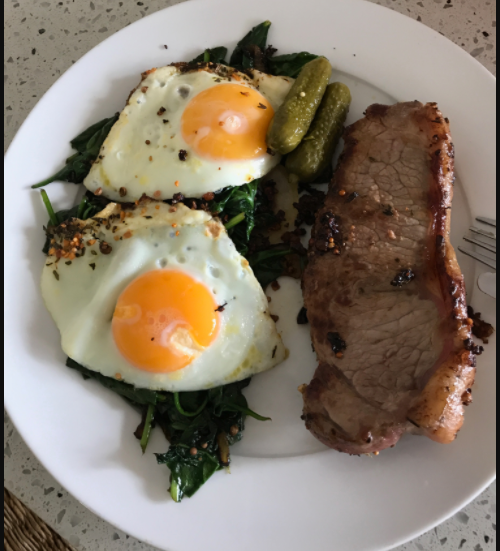

--2021-06-09 03:30:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  9.49MB/s    in 0.2s    

2021-06-09 03:30:40 (9.49 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



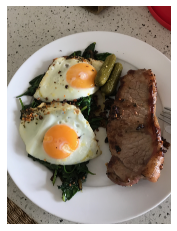

In [ ]:
# view example images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

TensorShape([224, 224, 3])

Vì mô hình của chúng ta chỉ nhận các hình ảnh có hình dạng(shape) `(224, 224, 3)` nên ta cần `reshape` lại hình ảnh trên để có thể thực hành với mô hình.

Để làm như vậy, chúng ta có thể nhập và giải mã hình ảnh của mình bằng `tf.io.read_file` (để đọc tệp) và `tf.image` (để thay đổi kích thước hình ảnh của chúng ta và biến nó thành tensor).

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image( filename, img_shape = 224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """

  # read in the image
  img =  tf.io.read_file(filename)
  # Decode it into tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Tuyệt vời, hình ảnh của chúng ta ở định dạng tensor, đã đến lúc thử nó với mô hình của chúng ta!

In [ ]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

ValueError: ignored

Mặc dù hình ảnh của chúng ta có cùng hình dạng với hình ảnh mà mô hình của chúng ta đã được đào tạo, chúng ta vẫn thiếu một chiều.

Chúng ta đã huấn luyện mô hình theo từng `batch` vậy nên `batch_size` sẽ trỏ thành chiều đầu tiên -> Trong thực tế, mô hình của chúng ta được đào tạo dựa trên dữ liệu ở dạng (`batch_size, 224, 224, 3`).

Chúng ta có thể khắc phục điều này bằng cách thêm phần bổ sung vào bộ căng hình ảnh tùy chỉnh của chúng ta bằng cách sử dụng `tf.expand_dims`.

In [ ]:
# Add an extra axis 
print(f'Shape before new dimension: {steak.shape}')
steak = tf.expand_dims(steak, axis = 0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f'Shape after new dimension: {steak.shape}')
steak 

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

array([[0.8443216]], dtype=float32)

Các dự đoán được đưa ra dưới dạng xác suất dự đoán. Nói cách khác, điều này có nghĩa là hình ảnh có khả năng là lớp này hay lớp khác.

Vì chúng ta đang làm việc với một bài toán phân loại nhị phân, nếu xác suất dự đoán trên 0,5, theo mô hình, dự đoán rất có thể là lớp xác định (1). Và nếu xác suất dự đoán dưới 0,5, theo mô hình, lớp dự đoán có nhiều khả năng là lớp âm (0).

>**Note**: Mức cắt 0,5 có thể được điều chỉnh theo ý muốn.



In [ ]:
# Remind ourselves of our class names
class_names


array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

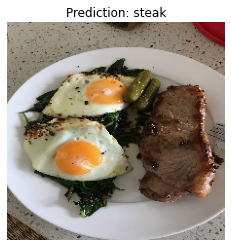

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

Mô hình của chúng ta đã dự đoán đúng.

Thử với hình ảnh khác

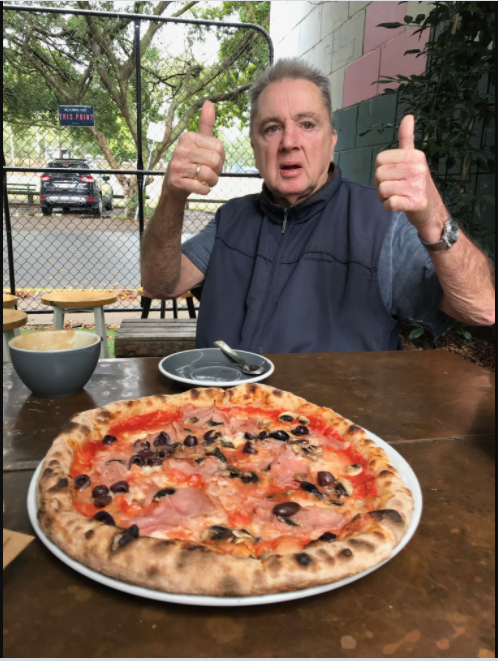

--2021-06-09 03:37:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  11.0MB/s    in 0.2s    

2021-06-09 03:37:29 (11.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



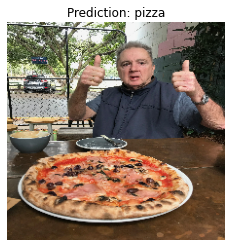

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

# **Multi-class Classification**

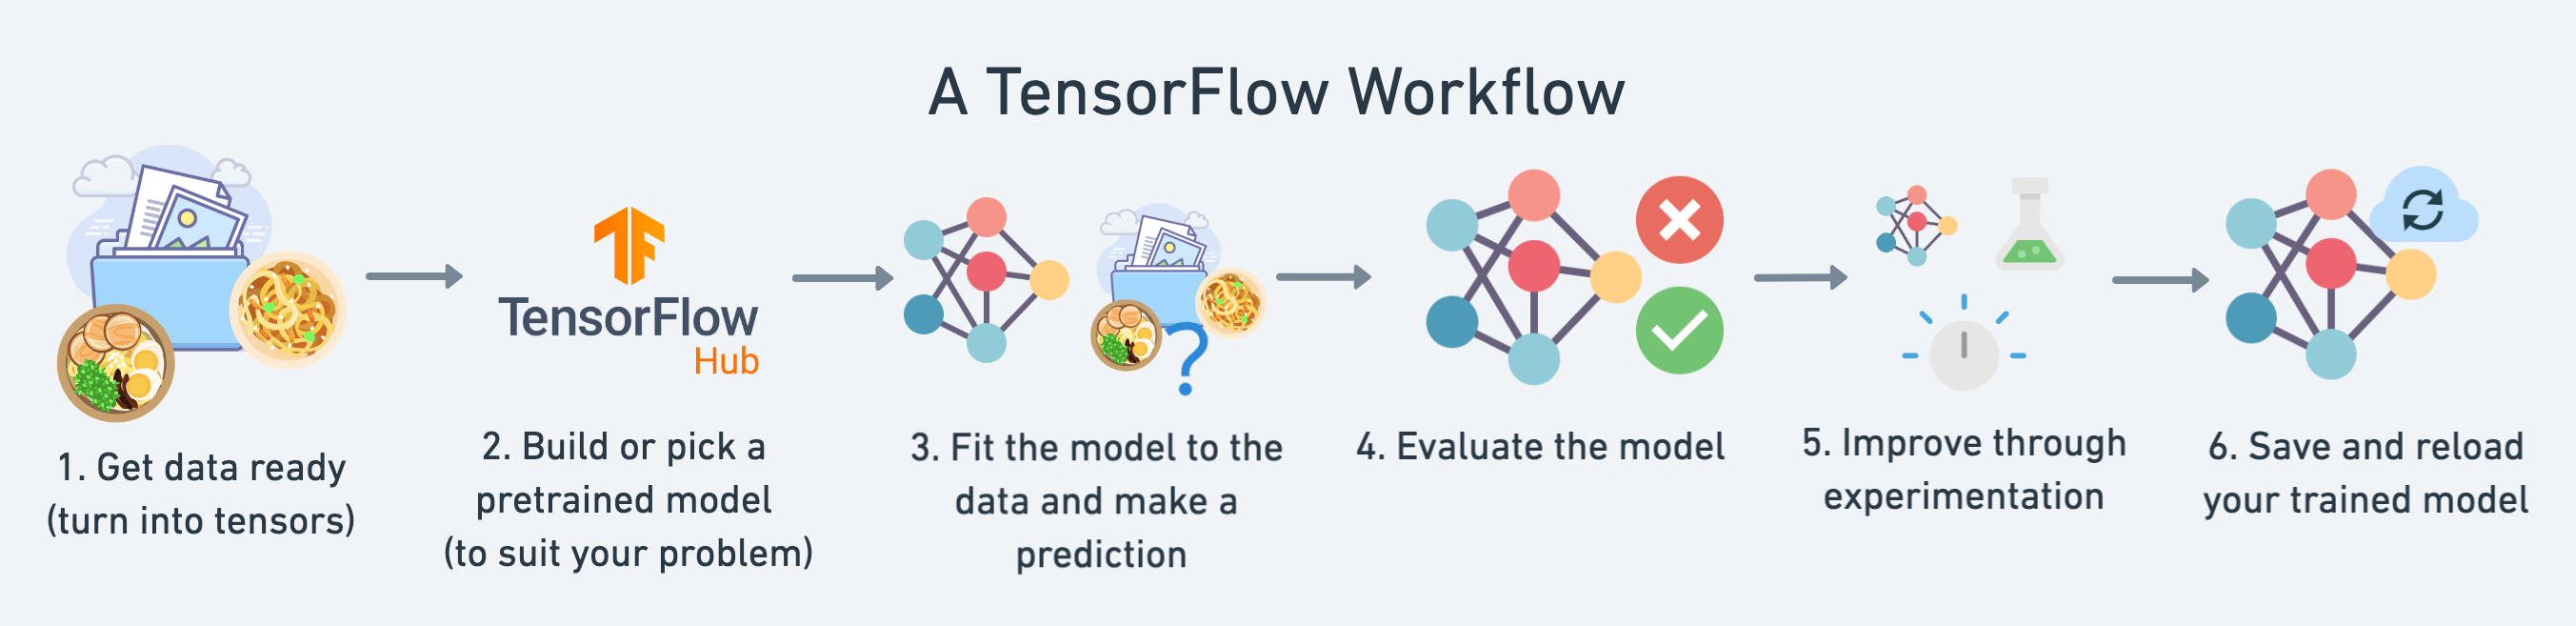

**1. Import and become one with the data**

In [ ]:
import zipfile

## Dowload zip file of 10_food_classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-06-09 03:37:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 209.85.146.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   143MB/s    in 3.6s    

2021-06-09 03:37:36 (137 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10_food_classes directory and list number of file
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

Tạo tập huấn luyện và tập kiểm tra

In [ ]:
multi_train_dir = "10_food_classes_all_data/train/"
multi_test_dir = "10_food_classes_all_data/test/"

Lấy tên các thư mục con

In [ ]:
# Get the class names for multi-class dataset
import pathlib
import numpy as np

data_dir = pathlib.Path(multi_train_dir)
multi_class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(multi_class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (382, 512, 3)


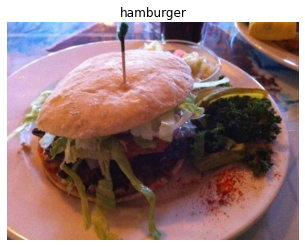

In [ ]:
# View a random image from training dataset
import random
img = view_random_image(target_dir = multi_train_dir,
                        target_class = random.choice(multi_class_names))

**2. Preprocess the data (prepare it for a model)**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances  
multi_train_datagen = ImageDataGenerator(rescale = 1/255)
multi_test_datagen = ImageDataGenerator(rescale = 1/255)

# Load data from directories and turn it to batches
multi_train_data = multi_train_datagen.flow_from_directory(multi_train_dir,
                                                           target_size = (224, 224),
                                                           batch_size = 32,
                                                           class_mode = 'categorical') # change to categorical
multi_test_data = multi_test_datagen.flow_from_directory(multi_test_dir,
                                                         target_size = (224, 224),
                                                         batch_size = 32,
                                                         class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


**3. Create a model (start with a baseline)**

Chúng ta có thể sử dụng cùng một mô hình (TinyVGG) mà chúng ta đã sử dụng cho bài toán phân loại nhị phân cho bài toán phân loại nhiều lớp của chúng ta với một vài chỉnh sửa nhỏ.

Cụ thể:
- Thay đổi lớp đầu ra để sử dụng có 10 nơ-ron ouput (cùng số với số lớp chúng ta có).
- Thay đổi lớp đầu ra sử dụng `activation = 'softmax'` thay vì `activation = 'sigmoid'`.
- Thay đổi hàm mất mát thành `'categorical_crossentropy'` thay vì `'binary_crossentropy'`.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model(a clone model_8, except to be multi-class)
multi_model_1 = Sequential(
    [
     Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
     Conv2D(10, 3, activation = 'relu'),
     MaxPool2D(),
     Conv2D(10, 3, activation = 'relu'),
     Conv2D(10, 3, activation = 'relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation = 'softmax')
    ]
)

# Compile the model
multi_model_1.compile(loss = 'categorical_crossentropy',
                      optimizer = 'Adam',
                      metrics = ['accuracy'])



**4. Fit a model**

In [ ]:
# Fit the model
multi_history_1 = multi_model_1.fit(multi_train_data, epochs = 5,
                                    steps_per_epoch = len(multi_train_data),
                                    validation_data = multi_test_data,
                                    validation_steps = len(multi_test_data))

Epoch 1/5
235/235 [==============================] - 495s 2s/step - loss: 2.1875 - accuracy: 0.1885 - val_loss: 2.0795 - val_accuracy: 0.2476
Epoch 2/5
235/235 [==============================] - 494s 2s/step - loss: 1.9200 - accuracy: 0.3304 - val_loss: 1.9635 - val_accuracy: 0.3076
Epoch 3/5
235/235 [==============================] - 487s 2s/step - loss: 1.5017 - accuracy: 0.4856 - val_loss: 2.0195 - val_accuracy: 0.3192
Epoch 4/5
235/235 [==============================] - 485s 2s/step - loss: 0.8415 - accuracy: 0.7241 - val_loss: 2.5568 - val_accuracy: 0.2976
Epoch 5/5
235/235 [==============================] - 485s 2s/step - loss: 0.3217 - accuracy: 0.9036 - val_loss: 3.7768 - val_accuracy: 0.2680


**5. Evaluate the model**

In [ ]:
# Evaluate on the test data
multi_model_1.evaluate(multi_test_data)

79/79 [==============================] - 50s 632ms/step - loss: 3.7768 - accuracy: 0.2680


[3.776752233505249, 0.2680000066757202]

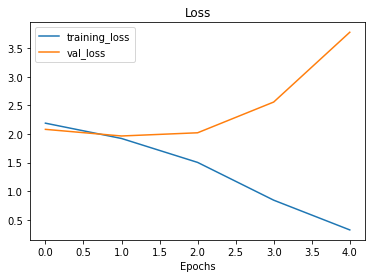

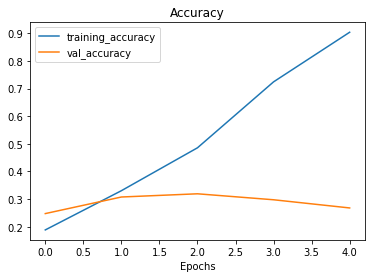

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(multi_history_1)

Ta thấy khoảng cách giữa `training loss` và `validation loss` là khá lớn. Điều này có vẻ như mô hình của chúng ta đang bị `overfitting` cho bộ đào tạo khá tệ. Nói cách khác, nó nhận được kết quả tuyệt vời trên dữ liệu đào tạo nhưng không tổng quát hóa tốt đối với dữ liệu không nhìn thấy và hoạt động kém trên dữ liệu thử nghiệm.



**6. Adjust the model parameters**

Theo hiệu suất của mô hình trên dữ liệu đào tạo, rõ ràng là mô hình của chúng ta đang học hỏi điều gì đó.

Lý tưởng nhất là chúng ta muốn mô hình của mình hoạt động tốt trên dữ liệu thử nghiệm cũng như trên dữ liệu đào tạo.

Vì vậy, các bước tiếp theo của chúng ta sẽ là thử và ngăn mô hình của chúng ta bị `overfitting`. Một số cách để ngăn chặn việc trang bị quá nhiều bao gồm:

>- **Get more data** - Có nhiều dữ liệu hơn mang lại cho mô hình nhiều cơ hội hơn để tìm hiểu các mẫu, các mẫu có thể khái quát hơn đối với các ví dụ mới.
>- **Simplify model** - Nếu mô hình hiện tại đã `overfitting` dữ liệu đào tạo, nó có thể quá phức tạp đối với một mô hình. Điều này có nghĩa là nó học các mẫu của dữ liệu quá tốt và không có khả năng tổng quát hóa tốt cho dữ liệu không nhìn thấy được. Một cách để đơn giản hóa một mô hình là giảm số lớp mà nó sử dụng hoặc giảm số đơn vị ẩn trong mỗi lớp.
- **Use data augmentation** - Tăng cường dữ liệu thao tác dữ liệu đào tạo theo cách để mô hình khó học hơn vì nó bổ sung thêm nhiều loại dữ liệu một cách giả tạo. Nếu một mô hình có thể học các mẫu trong dữ liệu tăng cường, thì mô hình đó có thể tổng quát hóa tốt hơn đối với dữ liệu không nhìn thấy.
- **Use transfer learning** - Học chuyển giao liên quan đến đòn bẩy của các mẫu (còn gọi là trọng số được đào tạo trước) mà một mô hình đã học để sử dụng làm nền tảng cho nhiệm vụ của riêng bạn. Trong trường hợp của chúng ta, chúng ta có thể sử dụng một mô hình thị giác máy tính được đào tạo trước trên nhiều hình ảnh và sau đó chỉnh sửa một chút để chuyên biệt hơn cho hình ảnh thực phẩm.



In [ ]:
# Try simplified model 
multi_model_2 = Sequential(
    [
     Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
     MaxPool2D(),
     Conv2D(10, 3, activation = 'relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation = 'softmax')
    ]
)

multi_model_2.compile(loss = 'categorical_crossentropy',
                      optimizer = 'Adam',
                      metrics = ['accuracy'])

multi_history_2 = multi_model_2.fit(multi_train_data, epochs = 5,
                                    steps_per_epoch = len(multi_train_data),
                                    validation_data = multi_test_data,
                                    validation_steps = len(multi_test_data))

Epoch 1/5
235/235 [==============================] - 231s 983ms/step - loss: 2.1561 - accuracy: 0.2491 - val_loss: 1.9905 - val_accuracy: 0.3032
Epoch 2/5
201/235 [========================>.....] - ETA: 28s - loss: 1.8034 - accuracy: 0.3826

In [ ]:
plot_loss_curves(multi_history_2)

Ngay cả với một mô hình được đơn giản hóa, có vẻ như mô hình của chúng ta vẫn overfitting dữ liệu đào tạo.

Tiếp theo chúng ta sẽ thử sử dụng tăng cường dữ liệu với `ImageDataGenerator` và thêm một số tham số `rotation_range` và `horizontal_flip`

In [ ]:
# Create augment data generator instance
multi_train_datagen_augmented = ImageDataGenerator(rescale = 1/255,
                                                   rotation_range = 0.2,
                                                   width_shift_range = 0.2,
                                                   height_shift_range = 0.2,
                                                   zoom_range = 0.2,
                                                   horizontal_flip = True)
multi_train_data_augmented = multi_train_datagen_augmented.flow_from_directory(multi_train_dir,
                                                                               target_size = (224, 224),
                                                                               batch_size = 32,
                                                                               class_mode = 'categorical')

In [ ]:
# Clone the model (use the same architecture)
multi_model_3 = tf.keras.models.clone_model(multi_model_2)

# Compile the cloned model
multi_model_3.compile(loss = 'categorical_crossentropy',
                      optimizer = 'Adam',
                      metrics = ['accuracy'])

multi_history_3 = multi_model_3.fit(multi_train_data_augmented, epochs = 5,
                                    steps_per_epoch = len(multi_train_data_augmented),
                                    validation_data = multi_test_data,
                                    validation_steps = len(multi_test_data))


In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(multi_history_3)

Các đường cong tổn thất gần với nhau hơn nhiều. Mặc dù mô hình của chúng ta không hoạt động tốt trên tập hợp đào tạo tăng cường, nhưng nó hoạt động tốt hơn nhiều trên tập dữ liệu xác thực.

Có vẻ như nếu chúng ta tiếp tục đào tạo nó lâu hơn (nhiều epoch hơn), các chỉ số đánh giá có thể tiếp tục cải thiện.

**7. Repeat until satisfied**

Tăng số lượng `epoch` lên 15

In [ ]:
# Clone the model (use the same architecture)
multi_model_4 = tf.keras.models.clone_model(multi_model_2)

# Compile the cloned model
multi_model_4.compile(loss = 'categorical_crossentropy',
                      optimizer = 'Adam',
                      metrics = ['accuracy'])

multi_history_4 = multi_model_4.fit(multi_train_data_augmented, epochs = 15,
                                    steps_per_epoch = len(multi_train_data_augmented),
                                    validation_data = multi_test_data,
                                    validation_steps = len(multi_test_data))

In [ ]:
  plot_loss_curves(multi_history_4)

Mô hình đang có xu hướng học tốt, Chúng ta sẽ tiếp tục huấn luyện khi tăng số lượng `filter` lên thành 32

In [ ]:
# Increasing the number of filter
multi_model_5 = Sequential(
    [
     Conv2D(32, 3, activation = 'relu', input_shape = (224, 224, 3)),
     MaxPool2D(),
     Conv2D(32, 3, activation = 'relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation = 'softmax')
    ]
)

multi_model_5.compile(loss = 'categorical_crossentropy',
                      optimizer = 'Adam',
                      metrics = ['accuracy'])

multi_history_5 = multi_model_5.fit(multi_train_data, epochs = 10,
                                    steps_per_epoch = len(multi_train_data),
                                    validation_data = multi_test_data,
                                    validation_steps = len(multi_test_data))

In [ ]:
plot_loss_curves(multi_history_5)

**Making a prediction with our trained model**

In [ ]:
multi_class_names

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
# Make a prediction using model_11
pred_and_plot(model = multi_model_4, 
              filename = "03-steak.jpeg", 
              class_names= multi_class_names)

In [ ]:

pred_and_plot(multi_model_4, "03-sushi.jpeg", multi_class_names)

In [ ]:
pred_and_plot(multi_model_4, "03-pizza-dad.jpeg", class_names)

Có vẻ như mô hình của chúng ta không cho kết quả mong muốn 

Có thể là do hàm `pred_and_plot` 

Tiến hành dự báo ko sử dụng hàm

In [ ]:
#load img and preprocess custom image
img = load_and_prep_image('03-steak.jpeg')

#Make a prediction
pred = multi_model_4.predict(tf.expand_dims(img, axis = 0))

# Match the prediction class to the highest prediction probability
pred_class = multi_class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis = False

Kết quả đã khả quan hơn.



In [ ]:
pred

Vì mô hình của chúng ta có chức năng kích hoạt `'softmax'`và 10 nơ-ron đầu ra, nó đưa ra xác suất dự đoán cho mỗi lớp trong mô hình của chúng ta

Lớp có xác suất cao nhất là lớp mà mô hình tin rằng hình ảnh chứa.

Chúng ta có thể tìm chỉ mục giá trị lớn nhất bằng cách sử dụng `argmax` và sau đó sử dụng chỉ mục đó để lập chỉ mục danh sách tên_ lớp của chúng ta để xuất ra lớp được dự đoán.

In [ ]:
  multi_class_names[pred.argmax()]

In [ ]:
# Adjust function to work with multi-class
def multi_pred_and_plot(model, filename, multi_class_names):
  # Import the target image and preprocess
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class
  if len(pred[0]) > 1 : # Check for multi-class
    pred_class = multi_class_names[pred.argmax()] # if more than output, take the max
  else:
    pred_class = multi_class_names[int(tf.round(pred)[0,0])] # if only the output, round
  
  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis = False



In [ ]:
multi_pred_and_plot(multi_model_4, '03-steak.jpeg', multi_class_names)

In [ ]:
multi_pred_and_plot(multi_model_4, '03-sushi.jpeg', multi_class_names)

In [ ]:
multi_pred_and_plot(multi_model_4, '03-pizza-dad.jpeg', multi_class_names)

In [ ]:
multi_pred_and_plot(multi_model_4, '03-hamburger.jpeg', multi_class_names)

Kết quả dụ đoán đã tăng lên đang kể, tuy vậy vẫn có sai sót vì mô hình của chúng ta huấn luyện mới chỉ đạt được `accuracy` khoảng 0.4 - 0.46

**Saving and loading our model**

In [ ]:
multi_model_4.save("saved_trained_model")

In [ ]:
# Load in a model and evaluate it
load_multi_model = tf.keras.models.load_model('saved_trained_model')
load_multi_model.evaluate(multi_test_data)

In [ ]:
# Compare our unsaved model's results (same as above)
multi_model_4.evaluate(multi_test_data)